<a href="https://colab.research.google.com/github/gangerz/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_03_DNN%EA%B8%B0%EC%B4%88_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.03 DNN기초-회귀 모델

---
* 날짜: 2022-07-01
* 이름: 윤예현

## 학습내용
    - 딥러닝을 이용한 회귀 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 15장
* 데이터
  * 보스턴 집값 (boston houosing)
  * 캘리포티아 집값 (california housing) 

```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/gangerz/SkillTreePython-DeepLearning
```

In [2]:
!git clone https://github.com/gangerz/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 360 (delta 108), reused 97 (delta 70), pack-reused 196
Receiving objects: 100% (360/360), 32.79 MiB | 27.98 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

## 보스턴 집값 (boston houosing) 예측하기
---

> 1978년 집값에 가장 큰 영향을 미치는 것이 '깨끗한 공기' 라는 연구 겨로가가 하버드 대학교 도시개발학과에서 발표되었습니다. 이들은 자신의 주장을 뒷받침하기 위해 집값의 변동에 영향을 미치는 여러가지 요인을 모아서 환경과 집값의 변동을 보여주는 데이터셋을 만들었습니다. [ 모두의 딥러닝 중]


```
- 0 CRIM: 인구 1인당 범죄 발생 수
- 1 ZN: 25,000평방 피트 이상의 주거 구역 비중
- 2 INDUS: 소매업 외 상업이 차지하는 면적 비율
- 3 CHAS: 찰스강 위치 변수(1:강 주변, 0: 이외)
- 4 NOX: 일산화질소 농도
- 5 RM: 집의 평균 방 수
- 6 AGE: 1940년 이전에 지어진 비율
- 7 DIS: 5가지 보스턴 시 고용 시설까지의 거리
- 8 RAD: 순환고속도로의 접근 용이성
- 9 TAX: 10,000달러당 부동산 세율 총계
- 10 PTRATIO: 지역별 학생과 교사 비율
- 11 B: 지역별 흑인비율
- 12 LSTAT: 급여가 낮은 직업에 종사하는 인구 비율
- 13 가격 (단위 $1,000)
```

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-02.PNG?raw=true
 width=450>
</p>

### | 데이터 준비

#### **데이터 로드**
* `housing.csv`

In [4]:
data_path = '/content/SkillTreePython-DeepLearning/dataset/housing.csv'
dataset =  pd.read_csv(data_path,# 엑셀이나 csv 등 정현 데이터를 불러오기
                       header=None,# 첫번째 샘플이 헤더로 읽히지 않도록 설정
                       delim_whitespace = True
                       ) 
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### **데이터 전처리**

In [18]:
from sklearn.preprocessing import StandardScaler #머신러닝 라이브러리
from sklearn.model_selection import train_test_split

def path2dataset_housing(path):

  # <불러오기>
  dataset =  pd.read_csv(path,  # 엑셀이나 csv 등 정현 데이터를 불러오기
                       header=None, # 첫번째 샘플이 헤더로 읽히지 않도록 설정
                       delim_whitespace = True
                       ) 
  #print(dataset.shape) # 데이터 형식 : 판다스 데이터 프레임 

  # <정규화(속셩별로 데이터의 스케일을 조정)>
  scaler = StandardScaler()
  dataset = scaler.fit_transform(dataset)
  #print(dataset.shape, dataset.dtype) # 데이터 형식 : 넘파이 배열
  
  # <x-y 분할>
  x = dataset[:, 0:-1]  # ( : 모든행,첫번째 부터 마지막 전까지) * a:b -> a~b까지
  y = dataset[:, -1]    # 마지막꺼
  #print(x.shape, y.shape)

  # <**train-test 분할**>
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = path2dataset_housing(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


* 예측값 분포 확인

Text(0.5, 1.0, 'Price(test)')

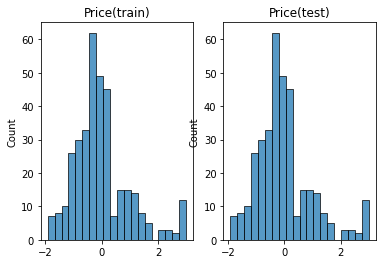

In [24]:
plt.subplot(121);sns.histplot(x=y_train);plt.title('Price(train)')
plt.subplot(122);sns.histplot(x=y_train);plt.title('Price(test)')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-01.PNG?raw=true width=600>
</p>

#### **모델 생성**

In [30]:
from tensorflow.keras import models, layers, utils
def build_model():
   x = layers.Input(shape = (13))
   y = layers.Dense(15,activation = 'relu')(x) 
   y = layers.Dense(6, activation = 'relu')(y) 
   y = layers.Dense(1)(y)
   model = models.Model(x, y)
   return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 15)                210       
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


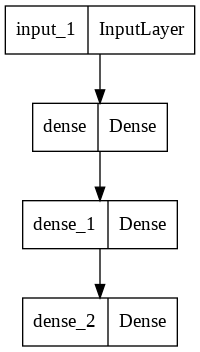

In [32]:
model = build_model()
model.summary()
utils.plot_model(model)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer) 
```
* `loss` : 손실함수, 회귀문제에서는 'mean_ssquared_error'
* `optimizer` : 문제에 따라 달라지지 않아요
 * sgd : 경사하강법
 * adam : sgd에서 파생된 함수

In [45]:
model.compile(loss = 'mean_ssquared_error',
              optimizer = 'adam')

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [46]:
model.fit(x_train, y_train, epochs=100, batch_size = 10)

Epoch 1/100


ValueError: ignored

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [44]:
model.evaluate(x_test, y_test)

ValueError: ignored

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [48]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten() # 2차원 텐서 -> 1차원 벡터
print(y_test.shape, y_pred.shape)
for i in range(10):
  print(f'*집값 : {y_test[i]}, 예측한 집값 : {y_pred[i]}')

(152,) (152,)
*집값 : 0.6168030642932465, 예측한 집값 : -0.012955943122506142
*집값 : 0.14880191096319792, 예측한 집값 : -0.763231635093689
*집값 : -0.6457116749226981, 예측한 집값 : 0.38729700446128845
*집값 : -0.05798929632217219, 예측한 집값 : -0.4484695792198181
*집값 : -0.18859426934451123, 예측한 집값 : -0.17489472031593323
*집값 : 0.05084818119644375, 예측한 집값 : -0.3094555735588074
*집값 : 0.5841518210376616, 예측한 집값 : -1.6207959651947021
*집값 : -0.8742703777117917, 예측한 집값 : 0.33091896772384644
*집값 : -0.11240803508148016, 예측한 집값 : -0.17143034934997559
*집값 : 0.007313190188997528, 예측한 집값 : 0.39782053232192993


* 예측 시각화

Text(0, 0.5, 'price')

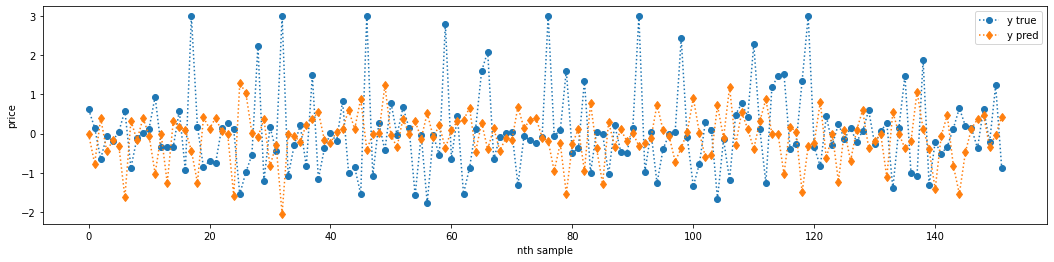

In [56]:
plt.figure(figsize = (18,4))
plt.plot(y_test, marker = 'o', linestyle = ':', label = 'y true')
plt.plot(y_pred, marker = 'd', linestyle = ':', label = 'y pred')
plt.legend()
plt.xlabel('nth sample')
plt.ylabel('price')

Text(0, 0.5, 'price')

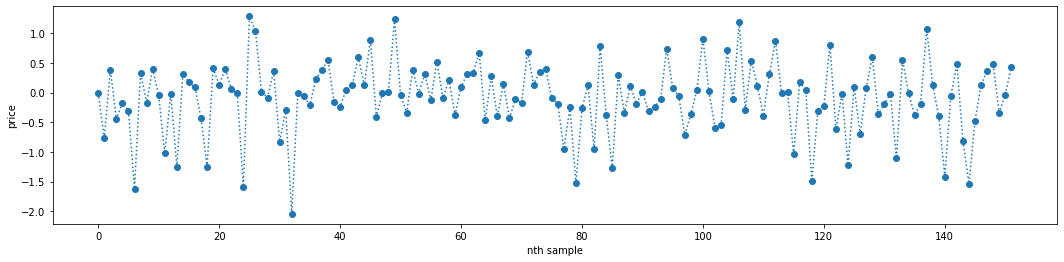

In [53]:
plt.figure(figsize = (18,4))
plt.plot(y_pred, marker = 'o', linestyle = ':', label = 'y true')
plt.xlabel('nth sample')
plt.ylabel('price')

## 과제
---

### | 과제1. 회귀 문제 정리

* 예측값(y)의 범위 : 연속, 무한, 보통은 정규화
* 예측값의 shape :  (샘플수, 1), (샘플수)
* 아웃풋 레이어의 노드 개수 :  1
* 아웃풋 레이어의 activation : 
회귀문제에서는 마지막레이어에 활성화함수를 쓰지 않는다.

* 손실함수 (loss) : 회귀 문제 : mse, mae....
* 평가함수 (metrics) : 회귀에서는 사용하지 않음

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

(506, 14)
(354, 13) (152, 13) (354,) (152,)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_3 (Dense)             (None, 15)                210       
                                                                 
 dense_4 (Dense)             (None, 6)                 96        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 1.0200
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - lo

Text(0, 0.5, 'Price')

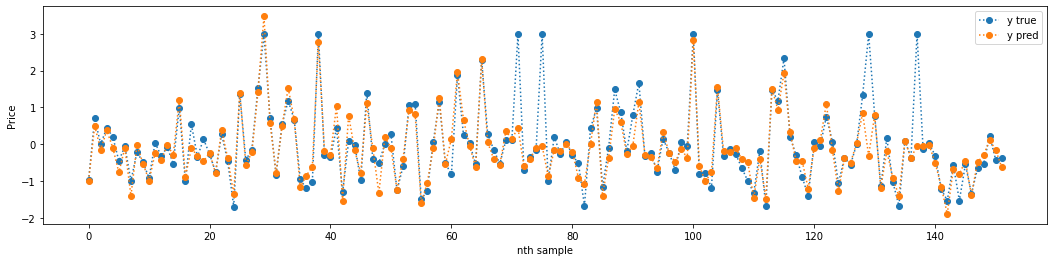

In [57]:
from sklearn.preprocessing import StandardScaler #머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

def path2dataset_housing(path):

  # 불러오기
  dataset =  pd.read_csv(path,  # 엑셀이나 csv 등 정현 데이터를 불러오기
                       header=None, # 첫번째 샘플이 헤더로 읽히지 않도록 설정
                       delim_whitespace = True
                       ) 
  print(dataset.shape)  #데이터형식 : 판다스 데이터프레임
  # 정규화(속셩별로 데이터의 스케일을 조정)
  scaler = StandardScaler()
  dataset = scaler.fit_transform(dataset)
  #print(dataset.shape, dataset.dtype) # 데이터형식 : 넘파이 배열

  # x-y 분할
  x = dataset[:, 0:-1] # ( : 모든행, 첫번째부터 마지막 전까지의 열)
  y = dataset[:, -1] # ( : 모든행, 마지막열)
  #print(x.shape, y.shape)

  # train-test 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3)
  
  return x_train, x_test, y_train, y_test

def build_model():
   x = layers.Input(shape = (13))
   y = layers.Dense(15, activation ='relu')(x) 
   y = layers.Dense(6, activation = 'relu')(y) 
   y = layers.Dense(1)(y) # 회귀 문제 경우, 마지막 레이어의 activation 사용하지 않는다
   model = models.Model(x, y) 
   return model
# 데이터 생성
x_train, x_test, y_train, y_test = path2dataset_housing(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 모델 생성
model = build_model()
model.summary()

# 컴파일 및 학습
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')
model.fit(x_train, y_train, epochs=100, batch_size = 10)
# 예측 및 시각화
y_pred = model.predict(x_test)
y_pred = y_pred.flatten() # 2차원 행렬 -> 1차 벡터

plt.figure(figsize = (18,4))
plt.plot(y_test, marker = 'o', linestyle = ':', label = 'y true')
plt.plot(y_pred, marker = 'o', linestyle = ':', label = 'y pred')
plt.legend()
plt.xlabel('nth sample')
plt.ylabel('Price')

### | 과제 3. 캘리포니아 집값 예측

---

> 1990년 캘리포니아 인구조사 데이터인 캘리포니아 주택 가격(California Housing Prices) 데이터를 사용하며 학습을 통해 주택 가격을 예측하는 문제입니다.


```
- 0 longitude: 경도
- 1 latitude: 위도
- 2 housing_median_age: 주택나이 (중앙값)
- 3 total_rooms: 전체 방 수
- 4 total_bedrooms: 전체 침실 수
- 5 population: 인구
- 6 households: 세대
- 7 median_income: 소득(중앙값)
- 8 median_house_value: 주택 가치(중앙값)
```

* `/content/sample_data/california_housing_train.csv` 

In [64]:
path = '/content/sample_data/california_housing_train.csv'
dataset =  pd.read_csv(path,  # 엑셀이나 csv 등 정현 데이터를 불러오기
                       ) 
print(dataset.shape)  #데이터형식 : 판다스 데이터프레임
dataset

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [74]:
from sklearn.preprocessing import StandardScaler #머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils


def path2dataset_cal(path):
  dataset =  pd.read_csv(path,  # 엑셀이나 csv 등 정현 데이터를 불러오기
                        ) 
  print(dataset.shape)  #데이터형식 : 판다스 데이터프레임

  # 정규화(속셩별로 데이터의 스케일을 조정)
  scaler = StandardScaler()
  dataset = scaler.fit_transform(dataset)
  #print(dataset.shape, dataset.dtype) # 데이터형식 : 넘파이 배열

  # x-y 분할
  x = dataset[:, 0:-1] # ( : 모든행, 첫번째부터 마지막 전까지의 열)
  y = dataset[:, -1] # ( : 모든행, 마지막열)
  #print(x.shape, y.shape)

  # train-test 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3)
  
  return x_train, x_test, y_train, y_test

def build_model():
   x = layers.Input(shape = (8))
   y = layers.Dense(20, activation ='relu')(x) 
   y = layers.Dense(15, activation = 'relu')(y) 
   y = layers.Dense(1)(y) # 회귀 문제 경우, 마지막 레이어의 activation 사용하지 않는다
   model = models.Model(x, y) 
   return model

In [75]:
path = '/content/sample_data/california_housing_train.csv'
x_train, x_test, y_train, y_test = path2dataset_cal(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = build_model()
model.summary()

model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')
model.fit(x_train, y_train, epochs=50, batch_size = 10)

(17000, 9)
(11900, 8) (5100, 8) (11900,) (5100,)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_24 (Dense)            (None, 15)                135       
                                                                 
 dense_25 (Dense)            (None, 6)                 96        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 238
Trainable params: 238
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1190/1190 [==============================] - 2s 2ms/step - loss: 0.5138
Epoch 2/50
1190/1190 [==============================] - 2s 2m

Text(0, 0.5, 'Price')

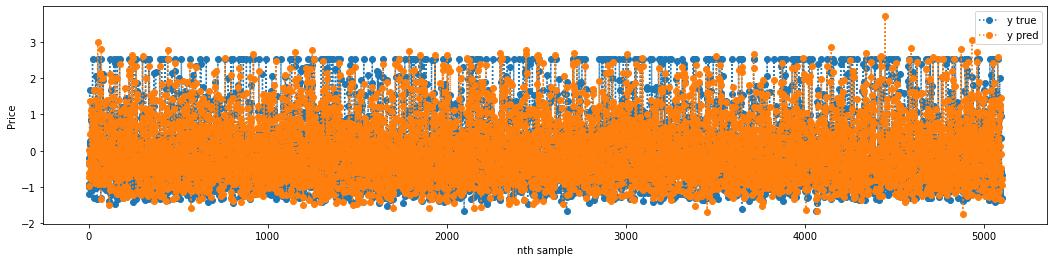

In [76]:
# 예측 및 시각화
y_pred = model.predict(x_test)
y_pred = y_pred.flatten() # 2차원 행렬 -> 1차 벡터


plt.figure(figsize = (18,4))
plt.plot(y_test, marker = 'o', linestyle = ':', label = 'y true')
plt.plot(y_pred, marker = 'o', linestyle = ':', label = 'y pred')
plt.legend()
plt.xlabel('nth sample')
plt.ylabel('Price')